# Introduction to Data Science - Homework 2
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, January 26, 11:59pm.

This homework is designed to reinforce the skills we covered in weeks 1 and 2: working with loops, conditions, functions, and the built-in Python data structures. We'll also calcluate descriptive statistics, and sample from a distribution. Make sure to go through the lectures again in case you have any troubles.

In this homework we'll do calculations that are also available in NumPy. For Parts 1 and 2, however, **we want you to implement the solutions using standard python functionality and the math library, and then check your results using NumPy**. See the the [NumPy library](http://docs.scipy.org/doc/numpy-1.11.0/reference/routines.statistics.html) documentation, and include the checks as a separate code cell. 


**For Part 3, you should use the SciPy libary, specifically [SciPy Stats](https://docs.scipy.org/doc/scipy/reference/stats.html).** 

## Your Data
Fill out the following information: 

*First Name:* Travis  
*Last Name:* Tiner
*E-mail:* travisjtiner@gmail.com or u0769566@utah.edu
*UID:* u0769566


## Part 1: Vector data

We first will work with a vector of yearly average temperatures from New Haven published [here](https://vincentarelbundock.github.io/Rdatasets/datasets.html). The data is included in this repository in the file `nhtmep.csv`.

The data is stored in the CSV format, which is a simple textfile with 'Comma Seperated Values'.
To load the data to into a (nested) python array, we use the [csv](https://docs.python.org/3/library/csv.html) library. The following code reads the file and stores it in a vector:

In [1]:
# import the csv library
import csv
# import the math library we'll use later
import math
# import the numpy library
import numpy as np

# initialize the array
temperature_vector = []

# open the file and append the values of the last column to the array
with open('nhtemp.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    # remove the first item as it is the title.
    next(filereader)
    for row in filereader:
        # here we append to the array and also cast from string to float
        temperature_vector.append(float(row[2]))
        
# print the vector to see if it worked
print (temperature_vector)

[49.9, 52.3, 49.4, 51.1, 49.4, 47.9, 49.8, 50.9, 49.3, 51.9, 50.8, 49.6, 49.3, 50.6, 48.4, 50.7, 50.9, 50.6, 51.5, 52.8, 51.8, 51.1, 49.8, 50.2, 50.4, 51.6, 51.8, 50.9, 48.8, 51.7, 51.0, 50.6, 51.7, 51.5, 52.1, 51.3, 51.0, 54.0, 51.4, 52.7, 53.1, 54.6, 52.0, 52.0, 50.9, 52.6, 50.2, 52.6, 51.6, 51.9, 50.5, 50.9, 51.7, 51.4, 51.7, 50.8, 51.9, 51.8, 51.9, 53.0]


We'll use the `temperature_vector` to calculate a couple of standard statistical measures next.

### Task 1.1: Calculate the Mean of a Vector

Write a function that calculates and returns the [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean) of a vector that you pass into it. 

Pass the temperature vector into this function and print the result. Provide a written interpretation of your results (e.g., "The mean temperature for New Haven for the years 1912 to 1971 is XXX degrees Fahrenheit.")

In [2]:
def mean(l):
    sum = 0
    for i in range(0,len(l)):
        sum += l[i]
    return sum/len(l)

mean(temperature_vector)

51.16

The mean temperature for New Haven for the years 1912 to 1971 is 51.16 degrees Fahrenheit.

In [3]:
np.mean(temperature_vector)


51.160000000000004

**Your Interpretation:** TODO

### Task 1.2: Calculate the Median of a Vector
Write a function that calculates and returns the [median](https://en.wikipedia.org/wiki/Median) of a vector. Pass the temperature vector into this function and print the result. Make sure that your function works for both, functions with an even and with an odd number of elements. In case of an even number of elements, use the mean of the two middle values. Provide a written interpretation of your results.

Hint: the [`sorted()`](https://docs.python.org/3/library/functions.html#sorted) function might be helpful for this.

In [4]:
def median(l):
    newl = sorted(l)
    if len(newl)%2 == 1:
        return newl[int((len(newl)-1)/2)]
    if len(newl)%2 == 0:
        return ((newl[int(len(newl)/2)]+newl[int((len(newl)/2)-1)])/2)
median(temperature_vector)

51.2

The median temperature for New Haven for the years 1912 to 1971 is 51.2 degrees Fahrenheit.

In [5]:
np.median(temperature_vector)

51.200000000000003

**Your Interpretation:** TODO

### Task 1.3: Calculate the Standard Deviation of a Vector

Write a function that calculates and returns the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of a vector. Pass the temperature vector into this function and print the result. Provide a written interpretation of your results.

The standard deviation is the square root of the average of the squared deviations from the mean, i.e.,

$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} {{(x_i - \mu)}^2} }$$

where $\mu$ is the mean of the vector. Hint: use your mean function to calculate it.

Hint: the `sqrt()` function from the [`math library`](https://docs.python.org/3/library/math.html) might be helpful for this. If you use a seperate file you need to load the library as we did in Part 1 to read in the data. The import looks like this:

In [6]:
def sd(l):
    sumofsquares = 0
    for i in range(0,len(l)):
        sumofsquares += (l[i]-mean(l))**2
    return math.sqrt(sumofsquares/len(l))
sd(temperature_vector)

1.2550166001558176

The standard deviation of the temperatures of New Haven from the years 1912 to 1971 is 1.255 degrees Fahrenheit.

In [7]:
np.std(temperature_vector)

1.2550166001558178

**Your Interpretation:** TODO

### Task 1.4: Histogram

Write a function that takes a vector and an integer `b` and calculates a [histogram](https://en.wikipedia.org/wiki/Histogram) with `b` bins. The function should return an array containing two arrays. The first should be the counts for each bin, the second should contain the borders of the bins.

For `b=5` your output should look like this: 

`[[3, 12, 33, 10, 2], [47.9, 49.24, 50.58, 51.92, 53.26, 54.6]]`

Here, the first array gives the size of these bins, the second defines the bands. I.e., the first band from 47.9-49.24 has 3 entries, the second, from 49.24-50.58 has 12 entries, etc. 

Provide a written interpretation of your results. Comment on whether the histogram is skewed, and if so, in which direction.

In [8]:
def hist(l,b):
    binsize = round((max(l)-min(l))/b,2)
    bins = []
    counts = []
    tt = min(l)
    while tt <= max(l):
        tt = round(tt,2)
        bins.append(tt)
        tt += binsize
    for i in range(0,len(bins)-1):
        count = 0
        for x in range(0,len(l)):
            if  bins[i] <= l[x] <= bins[i+1]:
                count += 1
        counts.append(count)
    hist = [counts,bins]
    return hist
hist(temperature_vector,5) 

[[3, 12, 33, 10, 2], [47.9, 49.24, 50.58, 51.92, 53.26, 54.6]]

The first bin has 3 entries, the second 12, the third 33, the fourth 10 and the last bin has 2 entries. This data appears to be relatively symmetric, and is not skewed either direction.

In [9]:
np.histogram(temperature_vector,5)

(array([ 3, 12, 33, 10,  2]),
 array([ 47.9 ,  49.24,  50.58,  51.92,  53.26,  54.6 ]))

**Your interpretation:** TODO

## Part 2: Working with Matrices

For the second part of the homework, we are going to work with matrices. The [dataset we will use](https://www.wunderground.com/history/airport/KSLC/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=) contains different properties of the weather in Salt Lake City for 2015 (temperature, humidity, sea level, ...). It is stored in the file [`SLC_2015.csv`](SLC_2015.csv) in this repository.

We first read the data from the file and store it in a nested python array (`weather_matrix`). A nested python array is an array, where each element is an array itself. Here is a simple example: 

In [10]:
arr1 = [1,2,3]
arr2 = ['a', 'b', 'c']

nestedArr = [arr1, arr2]
print(nestedArr)
nestedArr[1][2]

[[1, 2, 3], ['a', 'b', 'c']]


'c'

We provide you with the import code, which will write the data into the nested list `temperature_matrix`. The list contains one list for each month, which, in turn, contain the mean temparature of every day of that month. 

In [11]:
# initialize the 12 arrays for the months
temperature_matrix = [[] for i in range(12)]

# open the file and append the values of the last column to the array
with open('SLC_2015.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    # get rid of the header
    next(filereader)
    for row in filereader:
        month = int(row[0].split('/')[0])
        mean_temp = int(row[2])
        temperature_matrix[month-1].append(mean_temp)

print(temperature_matrix)

# the mean tempertarure on August 23. Note the index offset:
print("Mean temp on August 23: " + str(temperature_matrix[7][22]))

[[15, 19, 26, 28, 37, 38, 38, 36, 35, 31, 39, 36, 35, 30, 31, 31, 37, 44, 40, 35, 31, 31, 31, 33, 42, 41, 44, 42, 36, 40, 39], [39, 49, 50, 50, 53, 57, 60, 53, 55, 45, 43, 47, 46, 48, 43, 40, 38, 44, 47, 44, 39, 33, 31, 35, 44, 35, 37, 36], [40, 37, 34, 33, 39, 43, 45, 45, 46, 50, 54, 50, 51, 56, 62, 63, 61, 53, 47, 53, 57, 54, 52, 47, 42, 48, 56, 62, 53, 57, 63], [46, 44, 44, 54, 60, 50, 52, 46, 49, 53, 58, 50, 57, 56, 33, 44, 50, 54, 56, 56, 60, 61, 61, 59, 51, 46, 50, 57, 65, 63], [63, 71, 68, 67, 62, 59, 58, 57, 49, 53, 59, 68, 65, 65, 53, 48, 56, 58, 55, 59, 58, 58, 55, 57, 62, 59, 61, 61, 64, 71, 76], [80, 68, 69, 68, 69, 70, 66, 73, 77, 78, 72, 74, 75, 76, 81, 77, 78, 83, 83, 78, 81, 78, 78, 83, 82, 84, 87, 88, 91, 89], [87, 87, 87, 89, 79, 79, 76, 75, 73, 72, 77, 79, 81, 77, 80, 80, 79, 74, 74, 73, 76, 77, 75, 78, 78, 84, 77, 66, 70, 76, 79], [80, 79, 69, 76, 82, 74, 76, 69, 72, 79, 83, 81, 83, 88, 83, 79, 77, 72, 74, 76, 81, 74, 76, 84, 85, 78, 77, 80, 85, 82, 75], [82, 83, 82

We will now use the nested array `temperature_matrix` to compute the same metrics as in Part 1.

**Note:** Since the lists in the matrix are of varying lengths (28 to 31 days) many of the standard NumPy functions won't work.

### Task 2.1: Calculates the mean of a whole matrix

Write a function that calculates the mean of a matrix. For this version calculate the mean over all elements in the matrix as if it was one large vector. 
Pass in the matrix with the weather data and return the result. Provide a written interpretation of your results.
Can you use your function from Part 1 and get a valid result?

In [12]:
def meanmat(l):
    sum = 0
    count = 0
    for i in range(0,len(temperature_matrix)):
        for x in range(0,len(temperature_matrix[i])):
            sum += temperature_matrix[i][x]
            count += 1
    return sum/count
meanmat(temperature_matrix)

56.76712328767123

The average temperature of Salt Lake City during 2015 was 56.76 degrees fahrenheit.

In [13]:
# here we create a flat version of the matrix that works well for np checks
flat_data = [i for x in temperature_matrix for i in x]
np.mean(flat_data)

56.767123287671232

**Your Interpretation:** TODO

### Task 2.2:  Calculate the mean of each vector of a matrix

Write a function that calculates the mean temperature of each month and returns an array with the means for each column. Provide a written interpretation of your results. Can you use the function you implemented in Part 1 here efficiently? If so, use it.

In [14]:
def meanmonth(l):
    mthavg = []
    for i in range(0,len(l)):
        
        mthavg.append(round(mean(l[i]),2))
    return mthavg
meanmonth(temperature_matrix)

[34.55,
 44.32,
 50.1,
 52.83,
 60.48,
 77.87,
 77.87,
 78.35,
 71.43,
 61.16,
 39.97,
 31.55]

In [15]:
print("The average temperatures from the months, starting in January and going through December in order, are: " + str(meanmonth(temperature_matrix)))

The average temperatures from the months, starting in January and going through December in order, are: [34.55, 44.32, 50.1, 52.83, 60.48, 77.87, 77.87, 78.35, 71.43, 61.16, 39.97, 31.55]


**Your Interpretation:** TODO

### Task 2.3:  Calculate the median of a whole matrix

Write a function that calculates and returns the median of a matrix over all values (independent from which row they are coming) and returns it. Provide a written interpretation of your results. Can you use your function from Part 1 and get a valid result?

In [16]:
def medianmat(l):
    new = [i for x in l for i in x]
    newer = sorted(new)
    return median(newer)
medianmat(temperature_matrix)

57

The median average daily temperature in 2015 for SLC was 57 degrees fahrenheit.

In [17]:
np.median(flat_data)

57.0

**Your Interpretation:** TODO

### Task 2.4: Calculate the median of each vector of a matrix

Write a function that calculates the median of each sub array (i.e. each column in the csv file) in the matrix and returns an array of medians (one entry for column in the csv file). To do so, use the function you implemented in Part 1. Provide a written interpretation of your results. 

In [18]:
def medianmonth(l):
    mthmed = []
    for i in range(0,len(l)):
        mthmed.append(median(l[i]))
    return mthmed
medianmonth(temperature_matrix)

[36, 44.0, 51, 53.5, 59, 78.0, 77, 79, 73.0, 62, 40.0, 32]

In [19]:
print("The median monthly average temperature in 2015, from January to December respectively, was " + str(medianmonth(temperature_matrix)))

The median monthly average temperature in 2015, from January to December respectively, was [36, 44.0, 51, 53.5, 59, 78.0, 77, 79, 73.0, 62, 40.0, 32]


**Your Interpretation:** TODO

### Task 2.5: Calculate the standard deviation of a whole matrix

Write a function that calculates the standard deviation of a matrix over all values in the matrix (ignoring from which column they were coming) and returns it. Can you use your function from Part 1 and get a valid result? Provide a written interpretation of your results. 

In [20]:
def stdmat(l):
    sumofsquares = 0
    count = 0
    xbar = meanmat(l)
    for i in range(0,len(l)):
        for x in range(0,len(l[i])):
            sumofsquares += (l[i][x]-xbar)**2
            count += 1
    return math.sqrt(sumofsquares/count)
stdmat(temperature_matrix)

17.908994103709954

The standard deviation of the daily average temperature in 2015 in SLC was 17.91 degrees Fahrenheit.

In [21]:
np.std(flat_data)

17.908994103709954

**Your Interpretation:** TODO

### Task 2.6: Calculate the standard deviation of each vector of a matrix

Write a function that calculates the standard deviation of each array in the matrix and returns an array of standard deviations (one standard deviation for each column). To do so, use the function you implemented in Part 1.
Pass in the matrix with the temperature data and return the result. Provide a written interpretation of your results - is the standard deviation consistent across the seasons? 

In [22]:
def sdmonth(l):
    sdmed = []
    for i in range(0,len(l)):
        sdmed.append(sd(l[i]))
    return sdmed
sdmonth(temperature_matrix)

[6.5047809200539595,
 7.343868051591318,
 8.263229231729458,
 6.923791511078947,
 6.272679973334109,
 6.535713852025312,
 5.020872148142359,
 4.666617114845193,
 7.552850823070421,
 6.937959048194395,
 8.715822138820615,
 8.96890222245524]

In [23]:
print("The standard deviation of the daily average temperature in 2015, broken down into months from January to December respectively, was " + str(sdmonth(temperature_matrix)))

The standard deviation of the daily average temperature in 2015, broken down into months from January to December respectively, was [6.5047809200539595, 7.343868051591318, 8.263229231729458, 6.923791511078947, 6.272679973334109, 6.535713852025312, 5.020872148142359, 4.666617114845193, 7.552850823070421, 6.937959048194395, 8.715822138820615, 8.96890222245524]


**Your Interpretation:** TODO

## Part 3: Poisson distribution 

Another example of a discrete random variable is a Poisson random variable. 

Read the [wikipedia article on the Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

**3.1 Descriptive statistics.** Describe what a Poisson random variable is. What is the parameter, $\lambda$? What is the min, max, mean, and variance of a Poisson random variable? 

It is a discrete probability distribution. It usually measures the number of times an event happens over a given time period. Its mean and its variance are both equal to the parameter lambda. The min of a poisson is 0, and the max is infinity.

TODO: your description

**3.2 Example.** Give an example of an application that is described by a Poisson random variable.

Number of customers arriving to a store in one hour

TODO: your description

**3.3 Probability Mass Function.** For the parameter $\lambda = 2$, plot the probability mass function. 

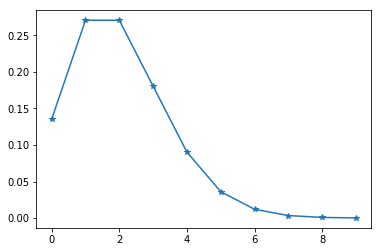

In [27]:
import scipy.stats as sc
import matplotlib.pyplot as plt

x = np.arange(0, 10)
p = sc.poisson.pmf(x,mu=2)
plt.plot(x, p,'*-')
plt.show()

**3.4 Poission sampling.** Write python code that takes 1000 samples from the Poisson distribution with parameter $\lambda = 2$. Make a histogram of the samples and compute the sample mean and variance. How does the histogram compare to the probability mass function?

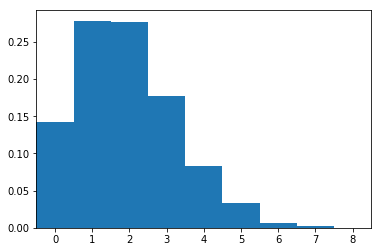

The mean is 1.929
The variance is 1.869958999999992


In [25]:
s = np.random.poisson(2,1000)
bins=np.arange(9)-.5
plt.hist(s, bins=bins,normed=True)
plt.xlim([-.5,8.5])
plt.show()
print("The mean is " + str(mean(s)))
print("The variance is " + str(sd(s)**2))

We get a mean very close to 2, and a variance very close to 2 as well. This is to be expected. The higher we take n the closer to 2 these will be become. Also, the histogram looks very similar to the pmf. Once again, the higher n, the closer it will look.

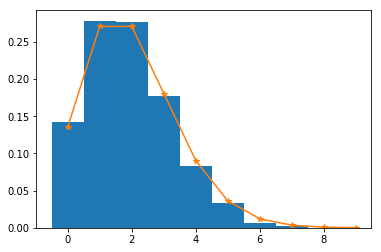

In [28]:
plt.hist(s, bins=bins,normed=True)
plt.plot(x, p,'*-')
plt.show()